### 1、从文件加载数据

In [2]:
import scipy.io as scio
from sklearn.utils import Bunch

digits = Bunch()

mat = scio.loadmat('./digits.mat')
digits.images = mat['data']
digits.target = mat['target'][0]
digits.data = digits.images.reshape((digits.images.shape[0],-1))
digits.images.shape, digits.target.shape, digits.data.shape

((1797, 8, 8), (1797,), (1797, 64))

### 2、用函数加载数据

In [3]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.images.shape, digits.target.shape, digits.data.shape

((1797, 8, 8), (1797,), (1797, 64))

数据集是三维的: 1797 个样本，每个数字由 8×8 的像素表示。

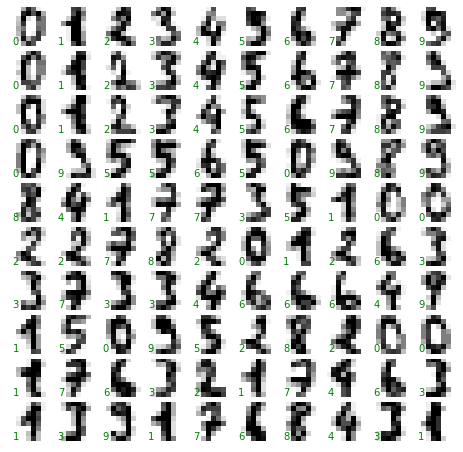

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

- 只看一个字

Text(0.05, 0.05, '2')

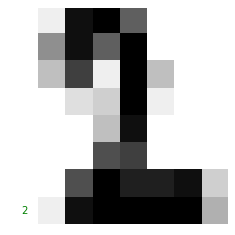

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(4,4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

ax.imshow(digits.images[1111], cmap='binary', interpolation='nearest')
ax.text(0.05, 0.05, str(digits.target[1111]), transform=ax.transAxes, color='green')

- 对于 Scikit-Learn, 我们需要将数据集表示成二维矩阵形式 ``[n_samples, n_features]``。


- 每个数字图像对应一行，即用若干个特征表示它。我们将每张图 $8\times8$ 矩阵按行存放，转化为一个 64 个数表示的向量。最后整个数据集用一个 $1797\times 64$ 的特征矩阵表示。


- 数字对应的像素值和标签对应数据集的 ``data`` 和 ``target`` 成员。

In [6]:
X = digits.data
X.shape

(1797, 64)

In [7]:
y = digits.target
y.shape

(1797,)

In [15]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

pca = PCA(n_components = 7)
pca.fit(digits.data)

res = pd.DataFrame(pca.transform(digits.data), columns=['PCA%i' % i for i in range(7)])

Xtrain, Xtest, ytrain, ytest = train_test_split(res, y, random_state=0)

print(Xtrain.shape,Xtest.shape,ytrain.shape, ytest.shape)
print(Xtrain, Xtest, ytrain, ytest)

(1347, 7) (450, 7) (1347,) (450,)
           PCA0       PCA1       PCA2      PCA3       PCA4      PCA5  \
372  -12.937665 -11.098313  28.171241  3.489346  -7.323366 -0.372837   
1443  -8.448564   0.664847   2.436838 -5.742458   0.480278  7.947044   
1792 -14.606622  13.344136 -13.439020 -6.502998   3.787744 -2.730789   
211    1.131063 -23.618780  -0.921709  0.953546  -5.461844  0.538238   
632   -7.412582  -5.106367  13.944029 -2.915200   6.659699  3.387890   
...         ...        ...        ...       ...        ...       ...   
835  -13.843690  -6.594678   5.715880 -7.161896   0.811346 -1.112649   
1216 -26.494867  12.185260 -10.615425 -1.881759  -5.972359  5.839190   
1653   4.512885 -19.188305  -0.366922  7.222367 -18.884523  1.461227   
559    3.773946 -16.611107 -15.083379  9.337400 -12.993168  8.825817   
684   -3.625467  -2.533781   8.076511  4.227588  -6.191895 -3.158500   

           PCA6  
372    3.384945  
1443  -6.533166  
1792  -4.430426  
211   -7.935176  
632   18.27

1797 行 64 列，表示 1797 个数字每个数字对应一个 64 维的特征向量。

In [35]:
#以下为作业内容

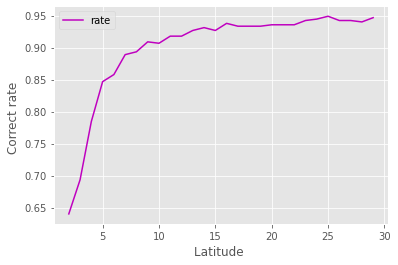

In [34]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

rate=[]
index=[]

for j in range(2,30):

    index.append(j)

    pca = PCA(n_components = j)
    pca.fit(digits.data)

    res = pd.DataFrame(pca.transform(digits.data), columns=['PCA%i' % i for i in range(j)])

    #print(res.shape)

    Xtrain, Xtest, ytrain, ytest = train_test_split(res, y, random_state=0)

    # 三部曲
    model = GaussianNB()
    model.fit(Xtrain, ytrain)
    y_model = model.predict(Xtest)

    a=accuracy_score(ytest, y_model)

    rate.append(a)

    #print(a)

plt.plot(index, rate, color='m', label='rate')
plt.xlabel("Latitude ")
plt.ylabel("Correct rate ")
plt.legend()
plt.show()